# Clase 11

-----

## Ejercicios 11 (a)

1. Graficar para valores de $k=1,2,5,10$ y como función del límite superior $L$, el valor de la integral:

$$ I(k,L) = \int_{0}^{L} x^{k} e^{-k x / 2} \sin{(k x)} dx $$

con rango de variación de $L$ entre $0$ y $2 \pi$.

-----

.

In [8]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt


def f(x, k):
    '''
    Integrando sin la función sin(kx)
    
    '''
    return x**k*np.exp(-k*x/2)

def I(k, L):
    return integrate.quad(f,0, L ,args = (k,), weight='sin', wvar=k)[0]

I_vec = np.vectorize(I)

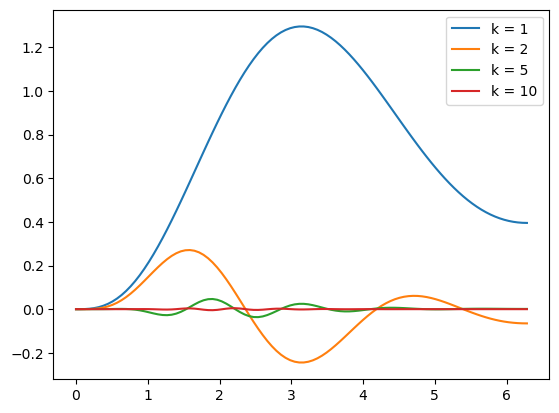

In [11]:
ks = [1,2,5,10]
x_array = np.linspace(0,2*np.pi,100)

for k in ks:
    plt.plot(x_array,I_vec(k,x_array), label = f"k = {k}")

plt.legend()


-----

## Ejercicios 11 (b)

2. En el archivo `palabras.words.gz` hay una larga lista de palabras, en formato comprimido.
Siguiendo la idea del ejemplo dado en clases realizar un histograma de las longitudes de las palabras.

3. Modificar el programa del ejemplo de la clase para calcular el histograma de frecuencia de letras en las palabras (no sólo la primera). Considere el caso insensible a la capitalización: las mayúsculas y minúsculas corresponden a la misma letra ('á' es lo mismo que 'Á' y ambas corresponden a 'a').

3. Utilizando el mismo archivo de palabras, Guardar todas las palabras en un array y obtener los índices de las palabras que tienen una dada letra (por ejemplo la letra 'j'), los índices de las palabras con un número dado de letras (por ejemplo 5 letras), y los índices de las palabras cuya tercera letra es una vocal. En cada caso, dar luego las palabras que cumplen dichas condiciones.

4. En el archivo `colision.npy` hay una gran cantidad de datos que corresponden al resultado de una simulación. Los datos están organizados en trece columnas. La primera corresponde a un parámetro, mientras que las 12 restantes corresponde a cada una de las tres componentes de la velocidad de cuatro partículas. Calcular y graficar:
  1. la distribución de ocurrencias del primer parámetro.
  2. la distribución de ocurrencias de energías de la tercera partícula.
  3. la distribución de ocurrencias de ángulos de la cuarta partícula, medido respecto al tercer eje.
  4. la distribución de energías de la tercera partícula cuando la cuarta partícula tiene un ángulo menor a 90 grados con el tercer eje.

  Realizar los cuatro gráficos utilizando un formato adecuado para presentación (charla o poster).

5. Leer el archivo `colision.npy` y guardar los datos en formato texto con un encabezado adecuado. Usando el comando mágico `%timeit` o el módulo timeit, comparar el tiempo que tarda en leer los datos e imprimir el último valor utilizando el formato de texto y el formato original `npy`. Comparar el tamaño de los dos archivos.
  
1. El submódulo **scipy.constants** tiene valores de constantes físicas de interés. 
Usando este módulo compute la constante de Stefan-Boltzmann $\sigma$ utilizando la relación:
$$\sigma = \frac{2 \pi^5 k_B^4}{15 h^3 c^2}$$
Confirme que el valor obtenido es correcto comparando con la constante para esta cantidad en ``scipy.constants``

2. Usando **Scipy** y **Matplotlib** grafique las funciones de onda del oscilador armónico unidimensional para las cuatro energías más bajas ($n=1,2,3,4$), en el intervalo $[-5,5]$. Asegúrese de que están correctamente normalizados.

Las funciones están dadas por:

$$ \psi _{n}(x)={\frac {1}{\sqrt {2^{n}\,n!}}}\cdot \left({\frac {\omega }{\pi}}\right)^{1/4}\cdot e^{-{\frac {\omega x^{2}}{2 }}}\cdot H_{n}\left({\sqrt{\omega}}\, x\right),\qquad n=0,1,2,\ldots .$$

donde $H_{n}$ son los polinomios de Hermite, y usando $\omega = 2$.

Trate de obtener un gráfico similar al siguiente (tomado de [wikipedia](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). Realizado por By AllenMcC. - File:HarmOsziFunktionen.jpg, [CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=11623546))

![](figuras/HarmOsziFunktionen.png)

-----
